In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

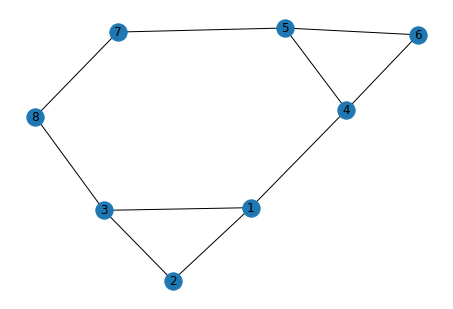

In [2]:
H = nx.Graph()
H.add_nodes_from([i+1 for i in range(8)])
edg = [
    (1,2), (2,3), (3,1), (1,4), (4,5), (5, 6), (6,4), (5,7), (7,8), (8,3)
]

for e in edg:
    H.add_edge(*e)


nx.draw(H, with_labels=1)

[]

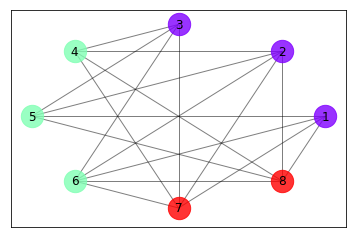

In [4]:
H_comp = nx.complement(H)
strategy = 'independent_set'
greedy_string = nx.greedy_color(H_comp, strategy=strategy, interchange=False)

unique_colours = set(greedy_string.values())

colour_key_for_nodes_string = {}
for colour in unique_colours:
    colour_key_for_nodes_string[colour] = [k for k in greedy_string.keys()
                                           if greedy_string[k] == colour]
colour_key_for_nodes_string = colour_key_for_nodes_string


import matplotlib.cm as cm

plt.figure()
colour_list = cm.rainbow(np.linspace(0, 1, len(colour_key_for_nodes_string)))
pos = nx.circular_layout(H_comp)

for colour in colour_key_for_nodes_string:
    nx.draw_networkx_nodes(H_comp, pos,
                           nodelist=[PauliWord for PauliWord in colour_key_for_nodes_string[colour]],
                           node_color=colour_list[colour],
                           node_size=500,
                           alpha=0.8)

nx.draw_networkx_edges(H_comp, pos, width=1.0, alpha=0.5)

# need to get FONT to change! TODO
nx.draw_networkx_labels(H_comp, pos, font_size=12)
plt.plot()

/////////////////////////////

In [9]:

# -*- coding: utf-8 -*-
#    Copyright (C) 2004-2016 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.
#
# Authors: Eben Kenah
#          Aric Hagberg (hagberg@lanl.gov)
#          Christopher Ellison
"""Connected components."""
import networkx as nx
from networkx.utils.decorators import not_implemented_for

__all__ = [
    'number_connected_components',
    'connected_components',
    'connected_component_subgraphs',
    'is_connected',
    'node_connected_component',
]

@not_implemented_for('directed')
def connected_components(G):
    """Generate connected components.

    Parameters
    ----------
    G : NetworkX graph
       An undirected graph

    Returns
    -------
    comp : generator of sets
       A generator of sets of nodes, one for each component of G.

    Raises
    ------
    NetworkXNotImplemented:
        If G is undirected.

    Examples
    --------
    Generate a sorted list of connected components, largest first.

    >>> G = nx.path_graph(4)
    >>> nx.add_path(G, [10, 11, 12])
    >>> [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
    [4, 3]

    If you only want the largest connected component, it's more
    efficient to use max instead of sort.

    >>> largest_cc = max(nx.connected_components(G), key=len)

    See Also
    --------
    strongly_connected_components
    weakly_connected_components

    Notes
    -----
    For undirected graphs only.

    """
    seen = set()
    for v in G:
        if v not in seen:
            c = set(_plain_bfs(G, v))
            yield c
            seen.update(c)

@not_implemented_for('directed')
def connected_component_subgraphs(G, copy=True):
    """Generate connected components as subgraphs.

    Parameters
    ----------
    G : NetworkX graph
       An undirected graph.

    copy: bool (default=True)
      If True make a copy of the graph attributes

    Returns
    -------
    comp : generator
      A generator of graphs, one for each connected component of G.

    Raises
    ------
    NetworkXNotImplemented:
        If G is undirected.

    Examples
    --------
    >>> G = nx.path_graph(4)
    >>> G.add_edge(5,6)
    >>> graphs = list(nx.connected_component_subgraphs(G))

    If you only want the largest connected component, it's more
    efficient to use max instead of sort:

    >>> Gc = max(nx.connected_component_subgraphs(G), key=len)

    See Also
    --------
    connected_components
    strongly_connected_component_subgraphs
    weakly_connected_component_subgraphs

    Notes
    -----
    For undirected graphs only.
    Graph, node, and edge attributes are copied to the subgraphs by default.

    """
    for c in connected_components(G):
        if copy:
            yield G.subgraph(c).copy()
        else:
            yield G.subgraph(c)
@not_implemented_for('directed')
def is_connected(G):
    """Return True if the graph is connected, false otherwise.

    Parameters
    ----------
    G : NetworkX Graph
       An undirected graph.

    Returns
    -------
    connected : bool
      True if the graph is connected, false otherwise.

    Raises
    ------
    NetworkXNotImplemented:
        If G is undirected.

    Examples
    --------
    >>> G = nx.path_graph(4)
    >>> print(nx.is_connected(G))
    True

    See Also
    --------
    is_strongly_connected
    is_weakly_connected
    is_semiconnected
    is_biconnected
    connected_components

    Notes
    -----
    For undirected graphs only.

    """
    if len(G) == 0:
        raise nx.NetworkXPointlessConcept('Connectivity is undefined ',
                                          'for the null graph.')
    return len(set(_plain_bfs(G, arbitrary_element(G)))) == len(G)
@not_implemented_for('directed')
def node_connected_component(G, n):
    """Return the nodes in the component of graph containing node n.

    Parameters
    ----------
    G : NetworkX Graph
       An undirected graph.

    n : node label
       A node in G

    Returns
    -------
    comp : set
       A set of nodes in the component of G containing node n.

    Raises
    ------
    NetworkXNotImplemented:
        If G is directed.

    See Also
    --------
    connected_components

    Notes
    -----
    For undirected graphs only.

    """
    return set(_plain_bfs(G, n))
def _plain_bfs(G, source):
    """A fast BFS node generator"""
    seen = set()
    nextlevel = {source}
    while nextlevel:
        thislevel = nextlevel
        nextlevel = set()
        for v in thislevel:
            if v not in seen:
                yield v
                seen.add(v)
                nextlevel.update(G[v])

[[1, 2, 3], [1, 4], [5, 4, 6], [5, 7], [7, 8], [8, 3]]
final_list =  [[1, 2, 3], [5, 4, 6], [7, 8]]
should agree with colouring above!!!


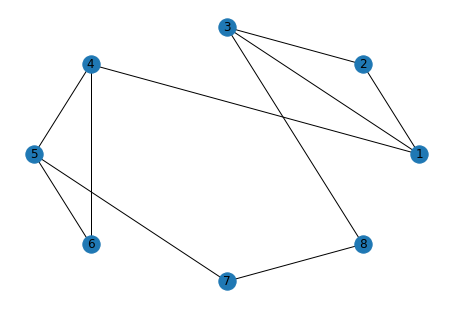

In [18]:
#https://stackoverflow.com/questions/29127350/completely-connected-subgraphs-from-a-larger-graph-in-networkx
print(list(nx.clique.find_cliques(H)))


graphs = list(connected_component_subgraphs(H))
#this allows access to connected_component_subgraphs function!!!!
#https://testfixsphinx.readthedocs.io/en/latest/_modules/networkx/algorithms/components/connected.html#connected_component_subgraphs

for graph in graphs:
    pos = nx.circular_layout(graph)
    plt.figure()
    nx.draw(graph, pos, with_labels=1)
    
#####
nodes = list(H.nodes)
cliques = list(nx.find_cliques(H))
sorted_cliques = sorted(cliques, key=len, reverse=True) # puts into size order! largest clique first!
clique_list=[]
for clique in sorted_cliques:
    #print(clique)
    if clique_list ==[]:
        clique_list.append(clique)
    else:
        checker = [i for i in clique for cc in clique_list if i in cc]

        if len(checker) > 0:
            continue
        else:
            clique_list.append(clique)
            
print('final_list = ', clique_list)
print('should agree with colouring above!!!')

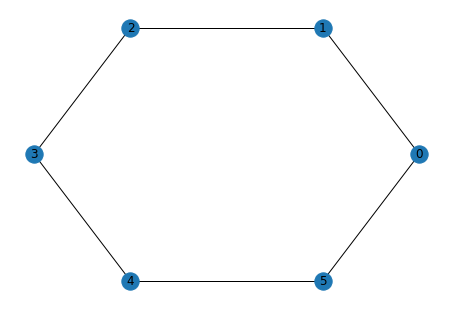

In [13]:
ll = nx.make_max_clique_graph(H)
pos = nx.circular_layout(ll)
plt.figure()
nx.draw(ll, pos, with_labels=1)
